In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics
from sklearn import tree
%matplotlib inline

In [2]:
# importing song dataset into the ide

SongTitles = pd.read_csv(r"/content/raag_song_prediction.csv")
SongTitles

,Song_ID,Raag_ID,Song_Name,Song_Views
0,S0001,R0001,Saaranga teri yaad mein,54356
1,S0002,R0001,Abhi na jaayo chhod kar,98766
2,S0003,R0001,Is mod se jaate hain,98432
3,S0004,R0001,Inhi logo ne le leena dupatta mera,12345
4,S0005,R0002,Ichak Dana Beechak Dana,7865
5,S0006,R0002,Suno Sajna Papihe Ne Kaha,1543
6,S0007,R0002,Woh To Chale Gaye Ae Dil.,234
7,S0008,R0002,Yun Hasraton Ke Dagh,121
8,S0009,R0003,Tere mere milan ki ye raina,121110
9,S0010,R0003,Mitwa kahen dhadkane tujse kya,8755


In [3]:
# importing raaga dataset into the ide

SongRaag = pd.read_csv(r"/content/RAAG-ID-AI.csv")
SongRaag

,Raag Name,Raag_ID,S,r,R,g,G,m,M,P,d,D,n,N,"S""","r""","R""","g""","G""","m""","M""","P""","d""","D""","n""","N""","S""'"
0,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1
1,BILAWAL,R0002,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1
2,KHAMAJ,R0003,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1
3,KAFI,R0004,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1
4,ASAVARI,R0005,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1
5,BHAIRAVI,R0006,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1
6,BHAIRAV,R0007,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1
7,MARWA,R0008,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1
8,PURVI,R0009,1,1,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,1,1
9,TODI,R0010,1,1,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1


In [4]:
# merging the two datasets basedc on the Raag_ID

AllSong = pd.merge(SongRaag,SongTitles,on='Raag_ID')
AllSong

,Raag Name,Raag_ID,S,r,R,g,G,m,M,P,d,D,n,N,"S""","r""","R""","g""","G""","m""","M""","P""","d""","D""","n""","N""","S""'",Song_ID,Song_Name,Song_Views
0,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0001,Saaranga teri yaad mein,54356
1,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0002,Abhi na jaayo chhod kar,98766
2,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0003,Is mod se jaate hain,98432
3,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0004,Inhi logo ne le leena dupatta mera,12345
4,BILAWAL,R0002,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,S0005,Ichak Dana Beechak Dana,7865
5,BILAWAL,R0002,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,S0006,Suno Sajna Papihe Ne Kaha,1543
6,BILAWAL,R0002,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,S0007,Woh To Chale Gaye Ae Dil.,234
7,BILAWAL,R0002,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,S0008,Yun Hasraton Ke Dagh,121
8,KHAMAJ,R0003,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,S0009,Tere mere milan ki ye raina,121110
9,KHAMAJ,R0003,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,S0010,Mitwa kahen dhadkane tujse kya,8755


In [5]:
# calculating the data descriptions such as mean, standard deviation, minimum, maximum

AllSong.describe()

,S,r,R,g,G,m,M,P,d,D,n,N,"S""","r""","R""","g""","G""","m""","M""","P""","d""","D""","n""","N""","S""'",Song_Views
count,40.0,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.0,40.00000,40.00000,40.000000,40.000000,40.0,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.0,40.00000,40.00000,40.000000,40.000000,40.0,40.000000
mean,1.0,0.50000,0.50000,0.400000,0.600000,0.600000,0.400000,1.0,0.50000,0.50000,0.400000,0.600000,1.0,0.50000,0.50000,0.400000,0.600000,0.600000,0.400000,1.0,0.50000,0.50000,0.400000,0.600000,1.0,21718.025000
std,0.0,0.50637,0.50637,0.496139,0.496139,0.496139,0.496139,0.0,0.50637,0.50637,0.496139,0.496139,0.0,0.50637,0.50637,0.496139,0.496139,0.496139,0.496139,0.0,0.50637,0.50637,0.496139,0.496139,0.0,34327.993797
min,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,1.0,45.000000
25%,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,1.0,1476.250000
50%,1.0,0.50000,0.50000,0.000000,1.000000,1.000000,0.000000,1.0,0.50000,0.50000,0.000000,1.000000,1.0,0.50000,0.50000,0.000000,1.000000,1.000000,0.000000,1.0,0.50000,0.50000,0.000000,1.000000,1.0,8460.000000
75%,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.0,12352.750000
max,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.00000,1.000000,1.000000,1.0,121110.000000


In [6]:
# We are finding the unique raag name

AllSong.describe(include=np.object)

,Raag Name,Raag_ID,Song_ID,Song_Name
count,40,40,40,40
unique,10,10,40,40
top,BILAWAL,R0005,S0035,Jago Re Jago Prabhat Aya
freq,4,4,1,1


In [7]:
# reshapping the dataset for song_views column

X = AllSong['S'].values.reshape(-1,1)
y = AllSong['Song_Views'].values.reshape(-1,1)

In [8]:
# Training and Testing the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Calling the Lindear regression method

L_regression=LinearRegression()
L_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# predicting the most accurate values upon applying linear regression

y_pred=L_regression.predict(X_test)

In [11]:
# Printing the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19632.53125
Mean Squared Error: 403903687.78222656
Root Mean Squared Error: 20097.355243469887


In [12]:
# Taking features from the data to apply to the decision tree

features = list(AllSong.columns[2:12])
features

['S', 'r', 'R', 'g', 'G', 'm', 'M', 'P', 'd', 'D']

In [13]:
# Deciding the plot for the decision tree

y = AllSong['Song_ID']
X = AllSong[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


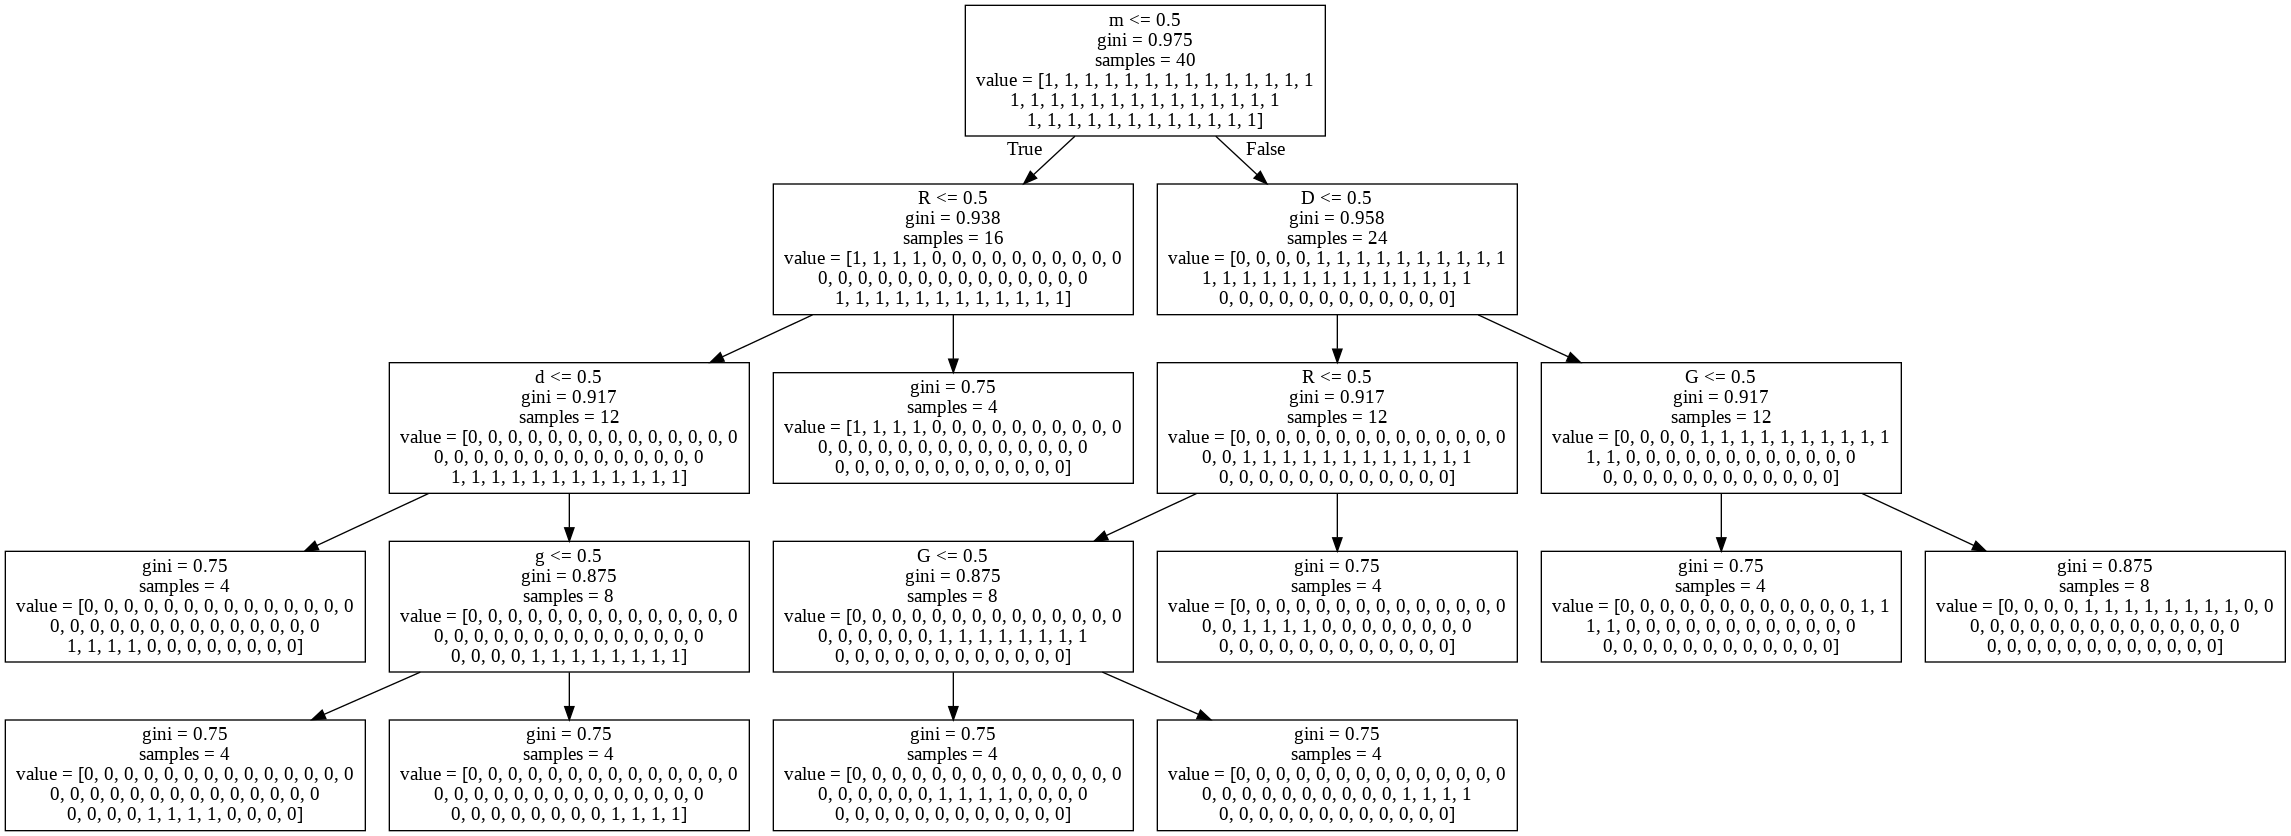

In [14]:
# Implementation of the Decision Tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

In [15]:
# User providing the 7 Input Notes.
# Based on these 7 inputs, the Agent idntifies the Raaga and recommencs the Song basec on the raaga in te rank of the most viewed

i = 1
while i <= 7:
 val = input("Enter Swara: ")
 AllSong=AllSong.loc[AllSong[val] == 1]
 i += 1
AllSong

Enter Swara: S
Enter Swara: R
Enter Swara: G
Enter Swara: M
Enter Swara: P
Enter Swara: D
Enter Swara: N


,Raag Name,Raag_ID,S,r,R,g,G,m,M,P,d,D,n,N,"S""","r""","R""","g""","G""","m""","M""","P""","d""","D""","n""","N""","S""'",Song_ID,Song_Name,Song_Views
0,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0001,Saaranga teri yaad mein,54356
1,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0002,Abhi na jaayo chhod kar,98766
2,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0003,Is mod se jaate hain,98432
3,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0004,Inhi logo ne le leena dupatta mera,12345


In [16]:
# On the basis of the song views, the most viewed song is recommended first.

AllSong.sort_values("Song_Views",ascending=False).head()


,Raag Name,Raag_ID,S,r,R,g,G,m,M,P,d,D,n,N,"S""","r""","R""","g""","G""","m""","M""","P""","d""","D""","n""","N""","S""'",Song_ID,Song_Name,Song_Views
1,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0002,Abhi na jaayo chhod kar,98766
2,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0003,Is mod se jaate hain,98432
0,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0001,Saaranga teri yaad mein,54356
3,KALYAN,R0001,1,0,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,S0004,Inhi logo ne le leena dupatta mera,12345
